The Dubin's Car is expressed with the following differential equations:

$$
\dot{x} = v * cos(\theta)   \\
\dot{y} = v * sin(\theta)   \\ 
\dot{\theta} = v * tan(u)
$$

Where $v$ is the velocity (note in the previous video it was assumed that $v=1$) and $u$ is the steering angle. Both the velocity and steering angle are constrained inputs to mimic the physical world. For example, the steering angle may be limited a value in the range $[-30, 30]$ (degrees) and the velocity [0, 100] (km/hour). It's also not uncommon to set the velocity to be a constant value.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

Defining the function which will return the steering angle randomly in the range of $[-30, 30]$. Please feel free to play with the range.

In [3]:
# limit the steering angle range
STEERING_ANGLE_MAX = np.deg2rad(30)

def sample_steering_angle():
    return np.random.uniform(-STEERING_ANGLE_MAX, STEERING_ANGLE_MAX)

Next you'll define the Dubin's car model based on the above differential equations. `state` is a 3-element array $[x, y, \theta]$. You'll compute the next state and return the result.

In [4]:
def simulate(state, angle, v, dt):
    # TODO: implement the dubin's car model
    # return the next state
    x = state[0]
    y = state[1]
    theta = state[2]    

    new_x = x + v*np.cos(theta)*dt #Original x + linear approximation for timestep dt
    new_y = y + v*np.sin(theta)*dt #Original y + linear approximation for timestep dt
    new_theta = theta + v*np.tan(angle)*dt #Original theta + linear approximation for timestep dt
    
    return [new_x, new_y, new_theta]

Initially, we place the car at the center of the coordinate system (0, 0) and give heading of $0$ which is facing in the positive direction along the $x$ axis.

In [5]:
# feel free to play around with these
v = 5
dt = 0.1
total_time = 50

# initial state
states = [[0, 0, 0]]

for _ in np.arange(0, total_time, dt):
    angle = sample_steering_angle()
    state = simulate(states[-1], angle, v, dt)
    states.append(state)

states = np.array(states)

Now let's visualize the path!

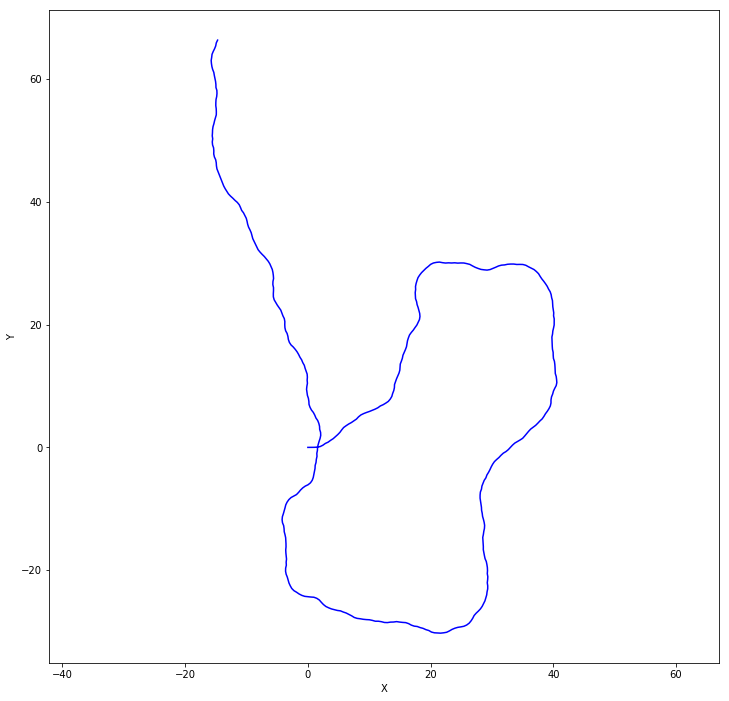

In [6]:
plt.plot(states[:, 0], states[:, 1], color='blue')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()